In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Data Management according to our usage
data = pd.read_csv("Salary_Data.csv")
data = data.rename(columns={"Years of Experience":"Experience"})
data = data.rename(columns={"Education Level":"Education"})
data = data.rename(columns={"Job Title":"Role"})
data = data.dropna(subset=["Experience", "Salary"])

# Scale Experience
x_mean = data["Experience"].mean()
x_std  = data["Experience"].std()
data["X"] = (data["Experience"] - x_mean) / x_std


data.head()

,Age,Gender,Education,Role,Experience,Salary,X
0,32,Male,Bachelor's,Software Engineer,5.0,90000.0,-0.510741
1,28,Female,Master's,Data Analyst,3.0,65000.0,-0.840782
2,45,Male,PhD,Senior Manager,15.0,150000.0,1.139464
3,36,Female,Bachelor's,Sales Associate,7.0,60000.0,-0.180700
4,52,Male,Master's,Director,20.0,200000.0,1.964567


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6701
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         6699 non-null   int64  
 1   Gender      6699 non-null   object 
 2   Education   6698 non-null   object 
 3   Role        6699 non-null   object 
 4   Experience  6699 non-null   float64
 5   Salary      6699 non-null   float64
 6   X           6699 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 418.7+ KB


In [12]:
#Loss Function
def loss(m,b,data):
    total = 0
    n = len(data)
    total = np.sum((data["Salary"] - (m*data["X"]+b))**2)
    return np.sqrt(total/n)

m = 0
b = 0
loss(m,b,data)


np.float64(126831.67615086754)

In [8]:
#Gradient Decent
def Gradient_Decent(m_now,b_now,l,data):
    grad_m = 0
    grad_b = 0
    n = len(data)

    grad_m = -(2/n) * np.sum(data["X"] * ( data["Salary"] - (m_now * data["X"] + b_now)))
    grad_b = -(2/n) * np.sum(data["Salary"] - (m_now * data["X"] + b_now))

    m_now = m_now - grad_m * l
    b_now = b_now - grad_b * l

    return m_now,b_now

m = 0
b = 0
l = 0.01
epochs = 600
for i in range(epochs):
    if i % 50 == 0:
        print(f"Iteration : {i} , loss : {loss(m,b,data)}")
    m , b = Gradient_Decent(m,b,l,data)

m_orig = m / x_std
b_orig = b - (m * x_mean) / x_std

Iteration : 0 , loss : 126831.67615086754
Iteration : 50 , loss : 54483.88260963358
Iteration : 100 , loss : 35053.60646221442
Iteration : 150 , loss : 31591.51072475151
Iteration : 200 , loss : 31103.422314088162
Iteration : 250 , loss : 31038.113395819397
Iteration : 300 , loss : 31029.441513551446
Iteration : 350 , loss : 31028.29122804505
Iteration : 400 , loss : 31028.138668876545
Iteration : 450 , loss : 31028.118435746594
Iteration : 500 , loss : 31028.11575233796
Iteration : 550 , loss : 31028.115396452642


In [13]:
print(m_orig,b_orig)
lis = []
for i in range(len(data)):
    x = data.iloc[i]["Experience"]
    lis.append(m_orig*x + b_orig)

7046.729935359835 58282.958567000045


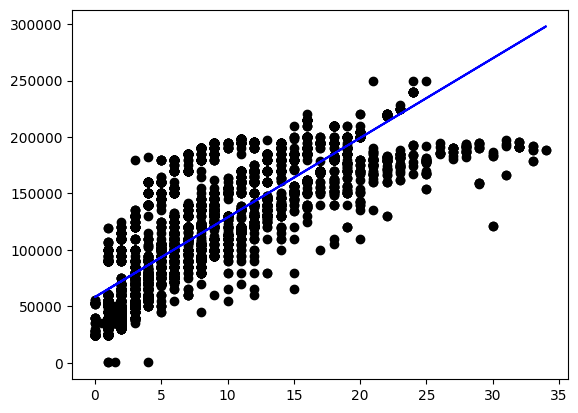

In [14]:
plt.scatter(data["Experience"], data["Salary"], color="black")
plt.plot(data["Experience"],lis,color="blue")
plt.show()
